## Homework 2

1. In the DataSets folder, read the data set 'College.csv' into Python. Perform simple linear regression, with `perc_alumni` as the independent variable and `S_F_ratio` as the response ($y$) variable. Report on the slope and intercept of the LSR line you find. What is the confidence interval for each? 

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting the data set
ds = pd.read_csv('College.csv')

# getting the variable arrays
X = ds['perc_alumni'].to_numpy()
Y = ds['S_F_Ratio'].to_numpy()

# Finding slope, intercept, y hat, n, x_bar and x_sum variable arrays
A = np.polyfit(X,Y,1)
m = A[0]
b = A[1]
Y_hat = m*X+b
n = len(X)
X_bar = np.mean(X)
X_sum = sum((X - X_bar)**2)

print("The slope is:", m,"and the intercept is:",b)

# Find the standard deviation squared
SD2 = sum((Y- Y_hat)**2) / (n-2)
# Find the standard error for m
SEm = np.sqrt(SD2 / X_sum)
# Find the standard error for b
SEb = np.sqrt(SD2 * (1/n + X_bar**2/X_sum))
# Find the confidence intervals:
Conf_m = (m-2*SEm,m+2*SEm)
Conf_b = (b-2*SEb,b+2*SEb)
print("The confidence interval for the slope is:",Conf_m)
print("The confidence interval for the intercept is:",Conf_b)

The slope is: -0.12870883349437415 and the intercept is: 17.017043121637805
The confidence interval for the slope is: (-0.14971223307431877, -0.10770543391442952)
The confidence interval for the intercept is: (16.473122587373204, 17.560963655902405)


2. Write out an explanation for why $R^2$ is scale invariant. In other words, for an arbitrary constant $c$, if you take all $y$-coordinates in the data $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$ and make the change $y_i \mapsto cy_i$ then show how $R^2$ remains the same.

Scanned from paper.

3. Check that $(\bar{x}, \bar{y})$ necessarily lies on the LSR line. (_Do this without using calculus, which means you should not use that_ $\sum_{i=1}^n(y_i - \hat{y}_i) = 0$.)
> Hint: Using ${\bf x}$ (resp. ${\bf y}$) for the vectors of $x$-coords (resp. $y$-coords), check that 
> $$A^TA = \begin{bmatrix}{\bf x}\cdot{\bf x} & n\bar{x} \\ n\bar{x} & n\end{bmatrix}; \qquad A^T{\bf y} = \begin{bmatrix}{\bf x}\cdot{\bf y} \\ n\bar{y}\end{bmatrix} $$ 

Scanned from paper.

4. Suppose that you have a data set, with $n=100$ points, with one independent variable $x$ and one response variable $y$. First, suppose that you fit a simple linear regression to the data. In addition, suppose that you also fit a cubic regression (that is, $\hat{y} = \hat{p}_0x^3 + \hat{p}_1x^2 + \hat{p}_2x + \hat{p}_3$). 

* Which of the two models, the linear regression or the cubic regression, should be expected to have a smaller MSE on the data? Do we have enough information to tell? Explain your reasoning. Additionally, you may use computations on example data to support your conclusion. 

The MSE for the cubic regression will be smaller since the cubic function is more flexible and can fit the data better than the linear regression line. Even if the data is perfectly strait, the cubic function can immitate that, so the MSE will always be smaller.

As shown bellow, the cubic regression can fit linear-skewed data, but the linear regression line can't do the smae for cubic. 

MSE for linear is: 0.0025923038787709057 MSE for cubic is: 0.0025596981326624618


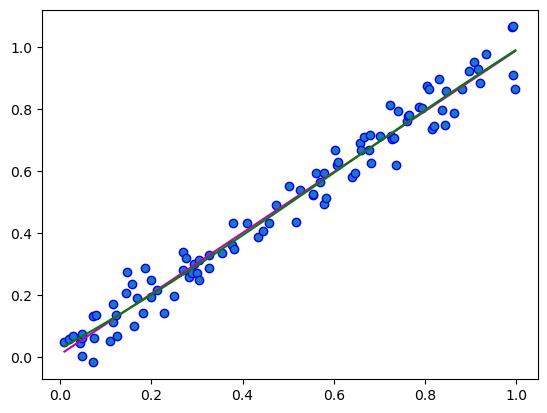

MSE for linear is: 0.014844045875367811 MSE for cubic is: 0.002614646977390418


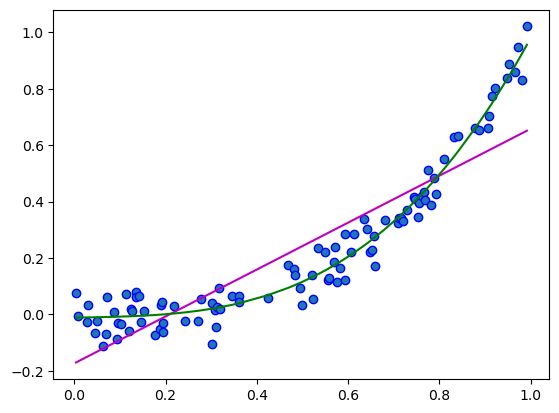

In [135]:
import matplotlib.pyplot as plt

def lin_reg(xarrays, y):
    n = len(xarrays[0])
    A = np.array(list(xarrays) + [np.ones(n)]).T
    AtA = A.T@A
    Aty = A.T@y
    return np.linalg.inv(AtA)@Aty

def find_reg(I,J):
    X = np.sort(np.random.uniform(0, 1, 100))
    E = np.random.normal(0, J, 100)
    Y = X**I + E
    
    # linear regression 
    lp = lin_reg([X],Y)
    Y_hat_linear = X*lp[0] + lp[1]
    MSE_linear = np.mean((Y-Y_hat_linear)**2)
    
    # cubic regression 
    cp = lin_reg([X,X**2,X**3],Y)
    Y_hat_cubic = cp[0]*X + cp[1]*X**2 + cp[2]*X**3 + cp[3]
    MSE_cubic = np.mean((Y-Y_hat_cubic)**2)
    
    print("MSE for linear is:",MSE_linear,"MSE for cubic is:",MSE_cubic)
    
    plt.scatter(X,Y, edgecolors = 'b')
    plt.plot(X,Y_hat_linear,color = 'm')
    plt.plot(X,Y_hat_cubic, color = 'g')
    plt.show()

find_reg(1,.05)
find_reg(3,.05)

**Extra challenge**

5. Using the 'College.csv' data set again, compute a column (or array), `F_Undergrad_perc`, that has the percentage of undergraduate students that are full-time &ndash; e.g., if you read in the DataFrame as `college`, you could use `100*(college['F_Undergrad']/(college['F_Undergrad'] + college['P_Undergrad']))` to get this column.
* With the column `Grad_Rate` as your response variable and the columns `perc_alumni`, `S_F_Ratio`, `Top25perc`, `F_Undergrad_perc`, and `Outstate` as your independent variables, use multiple linear regression on these variables to predict the values in `Grad_Rate`. What are the regression coefficients? 
* Which variable(s) are not significant.
> In the analysis to estimate how much coefficients fluctuate relative to their size, use 100 subsamples that are at least half the size of the data set.

In [77]:
# Getting the y variable array
YY = ds['Grad_Rate'].to_numpy()

# Getting the x variable arrays
perc_alumni = ds['perc_alumni'].to_numpy()
S_F_Ratio = ds['S_F_Ratio'].to_numpy()
Top25perc = ds['Top25perc'].to_numpy()
F_Undergrad_perc = 100*(ds['F_Undergrad']/(ds['F_Undergrad'] + ds['P_Undergrad'])).to_numpy()
Outstate = ds['Outstate'].to_numpy()
XX = [perc_alumni,S_F_Ratio,Top25perc,F_Undergrad_perc,Outstate]

# Using the function from a previous classwork to find the multiple linear regression 
def lin_reg(xarrays, y):
    n = len(xarrays[0])
    A = np.array(list(xarrays) + [np.ones(n)]).T
    AtA = A.T@A
    Aty = A.T@y
    return np.linalg.inv(AtA)@Aty

# Finding the regression coefficients 
p = lin_reg(XX, YY)
print("Linear coefficients are:","perc_alumni:",p[0],"S_F_Ratio",p[1],"Top25perc:",p[2],"F_Undergrad_perc:",p[3],"Outstate:",p[4])

# Predict the values in grad rate: 
YY_hat = p[0]*XX[0] + p[1]*XX[1] + p[2]*XX[2] + p[3]*XX[3] + p[4]

Linear coefficients are: perc_alumni: 0.28255683926469644 S_F_Ratio 0.2056162019633927 Top25perc: 0.18838405076097153 F_Undergrad_perc: 0.021738563101052932 Outstate: 0.001583771028751839
